In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Before the class
Download from here: https://rcweb.dartmouth.edu/Szhao/QBS148-statsgen/e4/

In [2]:
# Load Data
labels = np.loadtxt("/dartfs-hpc/rc/home/m/f0052zm/szhao_lab_share/public_html/QBS148-statsgen/e4/single_cell_data_labels.txt")
dataset = np.loadtxt('/dartfs-hpc/rc/home/m/f0052zm/szhao_lab_share/public_html/QBS148-statsgen/e4/single_cell_data.txt')

In [3]:
dataset = dataset.transpose()

In [4]:
dataset.shape

(90, 1000)

In [5]:
# dataset to 0 1 range

def range01(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

# Apply range01 function to each column
dataset = np.apply_along_axis(range01, 0, dataset)


In [6]:
dataset

array([[0.8666892 , 0.50831173, 0.7645518 , ..., 0.97375356, 1.        ,
        0.5041533 ],
       [0.62361605, 0.97760623, 0.56373281, ..., 0.60205088, 0.85653827,
        0.43901496],
       [0.7382978 , 0.58153416, 0.58365637, ..., 0.99397138, 0.57461051,
        0.46946538],
       ...,
       [0.15544371, 0.41972764, 0.19785842, ..., 0.11586934, 0.2880738 ,
        0.10738151],
       [0.        , 0.4164729 , 0.        , ..., 0.51387868, 0.42429237,
        0.22922602],
       [0.15585357, 0.        , 0.        , ..., 0.16003688, 0.16348052,
        0.14348486]])

# Build and train an autoencoder model for the single cell data

In this class we will train a simple autoencoder model for the single cell data.

We will first take a look at the data.

/dartfs-hpc/rc/home/m/f0052zm/.conda/envs/dp/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/dartfs-hpc/rc/home/m/f0052zm/.conda/envs/dp/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


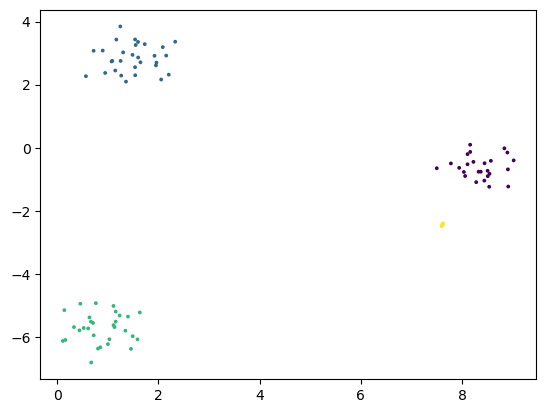

In [7]:
# tsne plots
tsne_data = TSNE(n_components=2).fit_transform(dataset)
plt.scatter(tsne_data[:,0],tsne_data[:,1],c=labels,s=3)

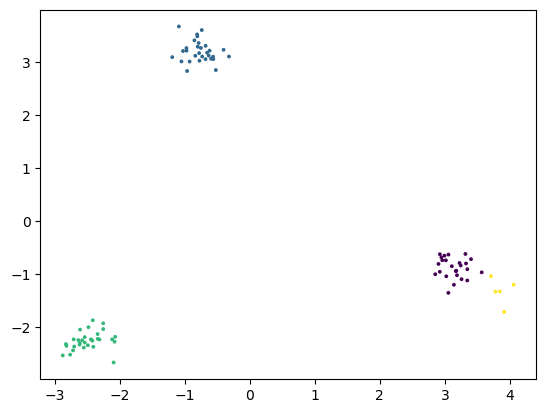

In [8]:
# pca plots
pca = PCA(n_components=2)
pca_data = pca.fit_transform(dataset)
plt.scatter(pca_data[:,0],pca_data[:,1],c=labels,s=3)

Build the autoencoder model. 

In [9]:
# Define the Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self, input_size, latent_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 10),
            nn.LeakyReLU(),
            nn.Dropout(0.1),
            nn.Linear(10, latent_size),
            nn.LeakyReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_size, 10),
            nn.LeakyReLU(),
            nn.Linear(10, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [10]:
# Training function
def train_autoencoder(latent_size):
    input_size = dataset.shape[1]
    model = Autoencoder(input_size, latent_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        for data in dataloader:
            optimizer.zero_grad()
            encoded, decoded = model(data)
            loss = criterion(decoded, data)
            loss.backward()
            optimizer.step()
            
        if (epoch + 1) % 100 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

    return model

# Function to generate and save PCA and t-SNE plots
def generate_plots(data, labels, filename_prefix):
    # tsne_data = TSNE(n_components=2).fit_transform(data)
    # plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels, s=3)

    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(data)
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, s=3)

In [20]:
# Convert dataset to PyTorch tensors
dataset = torch.tensor(dataset, dtype=torch.float32)

# Define hyperparameters
num_epochs = 2000
batch_size = 90
learning_rate = 1e-3
latent_size = 3

# DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle= False)

model = train_autoencoder(latent_size)

/dartfs-hpc/rc/home/m/f0052zm/.conda/envs/dp/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


Epoch [100/2000], Loss: 0.0729
Epoch [200/2000], Loss: 0.0642
Epoch [300/2000], Loss: 0.0639
Epoch [400/2000], Loss: 0.0627
Epoch [500/2000], Loss: 0.0598
Epoch [600/2000], Loss: 0.0587
Epoch [700/2000], Loss: 0.0578
Epoch [800/2000], Loss: 0.0565
Epoch [900/2000], Loss: 0.0551
Epoch [1000/2000], Loss: 0.0541
Epoch [1100/2000], Loss: 0.0533
Epoch [1200/2000], Loss: 0.0530
Epoch [1300/2000], Loss: 0.0525
Epoch [1400/2000], Loss: 0.0525
Epoch [1500/2000], Loss: 0.0520
Epoch [1600/2000], Loss: 0.0517
Epoch [1700/2000], Loss: 0.0517
Epoch [1800/2000], Loss: 0.0515
Epoch [1900/2000], Loss: 0.0515
Epoch [2000/2000], Loss: 0.0518


visualize the data on the latent space

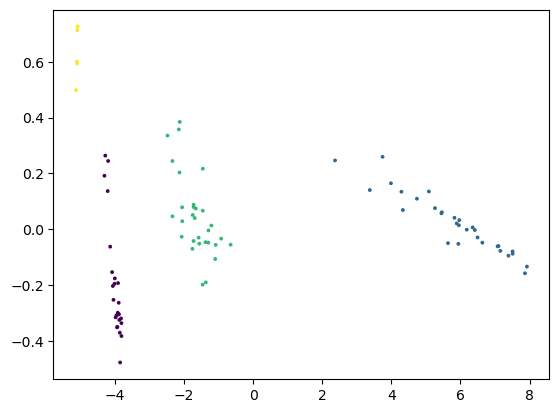

In [29]:
encoded_data = []
decoded_data = []
with torch.no_grad():
    for data in dataloader:
        encoded, decoded = model(data)
        encoded_data.append(encoded)
        decoded_data.append(decoded)
           
encoded_data = torch.cat(encoded_data).numpy()
reconstructions = torch.cat(decoded_data).numpy()

generate_plots(encoded_data, labels, f'encoded_{latent_size}')

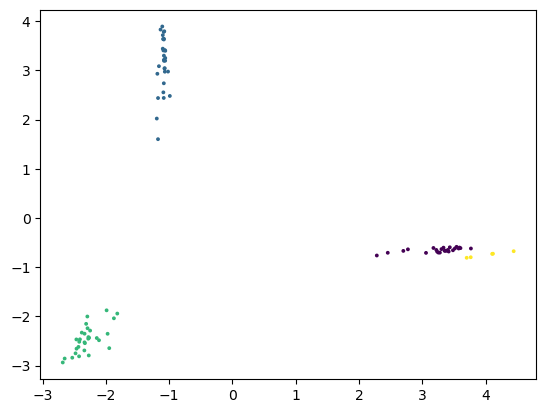

In [30]:
generate_plots(reconstructions, labels, f'decoded_{latent_size}')

# Reference

https://jef.works/blog/2019/05/17/scRNAseq-Dimensionality-Reduction-with-Deep-Learning-in-R-using-Keras/